In [33]:
import numpy as np
from tqdm import tqdm
import os

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K 
import math

In [34]:
train_x = []
train_y = []
eval_x = []
eval_y = []

In [35]:
csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
    for line in tqdm(f.read().splitlines()[1:]):
        emotion, pixels, usage = line.split(',')
    
        x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
        y = int(emotion)

        if usage == 'PrivateTest':
            eval_x.append(x)
            eval_y.append(y)
        else:
            train_x.append(x)
            train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:23<00:00, 1539.14it/s]

train : 32298, eval :3589


Angry


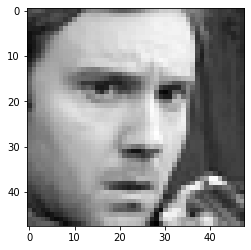

In [36]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [37]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5964288030439534643
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4137940596282711464
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15376810404536431421
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7229580256
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12344599833071124140
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [40]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [41]:
import tensorflow as tf

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48,48,1),weights=None,classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
history = model.fit(np.stack(train_x),
                    tf.keras.utils.to_categorical(train_y), 
                    epochs=5, batch_size=512,
                    validation_data=(np.stack(eval_x),
                                     tf.keras.utils.to_categorical(eval_y)),
                    callbacks=[lr_scheduler])

Epoch 1/5
64/64 [==============================] - 7s 107ms/step - loss: 2.2364 - categorical_accuracy: 0.2388 - val_loss: 1.8812 - val_categorical_accuracy: 0.1368 - lr: 0.0100
Epoch 2/5
64/64 [==============================] - 6s 96ms/step - loss: 1.7286 - categorical_accuracy: 0.3013 - val_loss: 1.8813 - val_categorical_accuracy: 0.1744 - lr: 0.0100
Epoch 3/5
64/64 [==============================] - 6s 99ms/step - loss: 1.6225 - categorical_accuracy: 0.3527 - val_loss: 1.9378 - val_categorical_accuracy: 0.1744 - lr: 0.0100
Epoch 4/5
64/64 [==============================] - 6s 100ms/step - loss: 1.5443 - categorical_accuracy: 0.3879 - val_loss: 1.9677 - val_categorical_accuracy: 0.1744 - lr: 0.0100
Epoch 5/5
64/64 [==============================] - 6s 98ms/step - loss: 1.5076 - categorical_accuracy: 0.4062 - val_loss: 2.0196 - val_categorical_accuracy: 0.1744 - lr: 0.0100


No handles with labels found to put in legend.


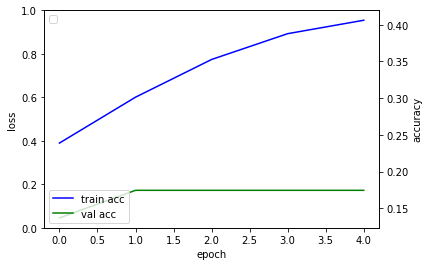

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()


acc_ax.plot(history.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [28]:
import tensorflow as tf

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
hist = model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=10,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/10
64/64 [==============================] - 7s 105ms/step - loss: 1.8310 - categorical_accuracy: 0.2448 - val_loss: 1.9340 - val_categorical_accuracy: 0.1655
Epoch 2/10
64/64 [==============================] - 6s 98ms/step - loss: 1.7132 - categorical_accuracy: 0.3113 - val_loss: 1.9286 - val_categorical_accuracy: 0.1744
Epoch 3/10
64/64 [==============================] - 6s 98ms/step - loss: 1.6102 - categorical_accuracy: 0.3673 - val_loss: 1.9263 - val_categorical_accuracy: 0.1744
Epoch 4/10
64/64 [==============================] - 6s 99ms/step - loss: 1.5032 - categorical_accuracy: 0.4215 - val_loss: 1.9414 - val_categorical_accuracy: 0.1744
Epoch 5/10
64/64 [==============================] - 6s 98ms/step - loss: 1.4240 - categorical_accuracy: 0.4525 - val_loss: 1.9562 - val_categorical_accuracy: 0.1368
Epoch 6/10
64/64 [==============================] - 6s 99ms/step - loss: 1.3511 - categorical_accuracy: 0.4842 - val_loss: 1.9874 - val_categorical_accuracy: 0.0153
Epoch 7/1

In [43]:
import os
model_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/model.h5'
model.save(model_path)

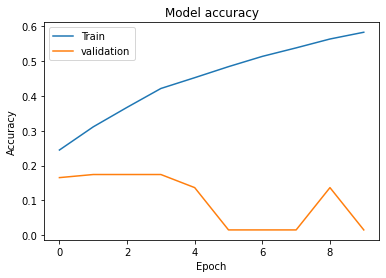

In [30]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()